In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else (x))

In [10]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

dfx = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

dfx = dfx.dropna(subset=['salary_year_avg'])

# dfx['salary_year_avg'].plot(kind = 'box', vert=False)

job_list = [dfx[dfx['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

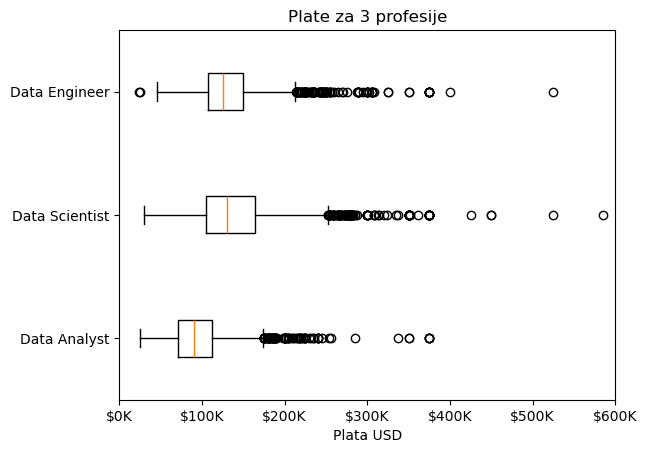

In [21]:
plt.boxplot(job_list, tick_labels=job_titles, vert=False)

plt.title('Plate za 3 profesije')
plt.xlabel('Plata USD')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))
plt.xlim(0, 600000)




plt.show()